In [1]:
!pip install seaborn --upgrade

     |████████████████████████████████| 283 kB 2.8 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0


In [2]:
import seaborn as sns
sns.__version__

'0.11.0'

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings as wn

%matplotlib inline
wn.filterwarnings('ignore')
np.random.seed(42)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [4]:
# Importing the data and displaying some rows
train = pd.read_csv('/kaggle/input/titanic/train.csv')
val = pd.read_csv('/kaggle/input/titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train = train.drop(['PassengerId'], axis=1)

In [6]:
labels = train.columns.tolist()

for label in labels:
    print(label,'has',round(train[label].isnull().sum()/train.shape[0]*100,2),'% of missing data')

Survived has 0.0 % of missing data
Pclass has 0.0 % of missing data
Name has 0.0 % of missing data
Sex has 0.0 % of missing data
Age has 19.87 % of missing data
SibSp has 0.0 % of missing data
Parch has 0.0 % of missing data
Ticket has 0.0 % of missing data
Fare has 0.0 % of missing data
Cabin has 77.1 % of missing data
Embarked has 0.22 % of missing data


In [7]:
labels = val.columns.tolist()

for label in labels:
    print(label,'has',round(val[label].isnull().sum()/val.shape[0]*100,2),'% of missing data')

PassengerId has 0.0 % of missing data
Pclass has 0.0 % of missing data
Name has 0.0 % of missing data
Sex has 0.0 % of missing data
Age has 20.57 % of missing data
SibSp has 0.0 % of missing data
Parch has 0.0 % of missing data
Ticket has 0.0 % of missing data
Fare has 0.24 % of missing data
Cabin has 78.23 % of missing data
Embarked has 0.0 % of missing data


In [8]:
train = train[['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',\
       'Fare', 'Cabin', 'Embarked','Survived']]

In [9]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


- Features:
    - quantitative:
        - Pclass: ordinal
        - Age, SibSp, Parch: discrete
        - Fare: continuous
    - qualitative:
        - Name, Ticket, Cabin, Embarked: nominal
        - Sex, Survived: binary

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
 10  Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


### Fill NAN

1. Age


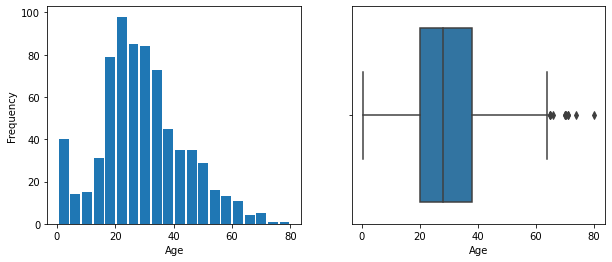

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.hist(train['Age'], bins=20, rwidth=0.85); ax1.set_xlabel('Age'); ax1.set_ylabel('Frequency')
sns.boxplot(train['Age'], ax=ax2);

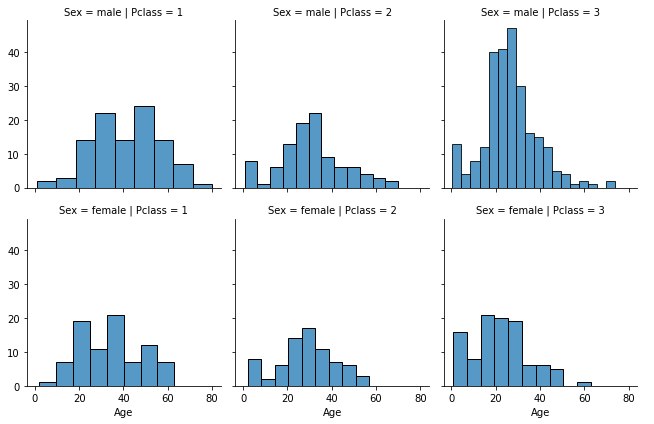

In [12]:
sns.FacetGrid(train, row='Sex', col='Pclass').map_dataframe(sns.histplot, 'Age').add_legend();

In [13]:
train.groupby(['Sex','Pclass'])['Age'].median()

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [14]:
age = np.array(train['Age'])
pclass = np.array(train['Pclass'])
sex = np.array(train['Sex'])

for i in range(age.shape[0]):
    if np.isnan(age[i]) == True: # if NaN
        if sex[i]=='female': # if female
            if pclass[i]==1:
                age[i]=35.
            elif pclass[i]==2:
                age[i]=28.
            elif pclass[i]==3:
                age[i]=21.5
        elif sex[i]=='male': # if male
            if pclass[i]==1:
                age[i]=40.
            elif pclass[i]==2:
                age[i]=30.
            elif pclass[i]==3:
                age[i]=25.
    else:
        age[i]=age[i]


In [15]:
train['Age']=age

In [16]:
train['Age'].isnull().sum()

0

In [17]:
age = np.array(val['Age'])
pclass = np.array(val['Pclass'])
sex = np.array(val['Sex'])

for i in range(age.shape[0]):
    if np.isnan(age[i]) == True: # if NaN
        if sex[i]=='female': # if female
            if pclass[i]==1:
                age[i]=35.
            elif pclass[i]==2:
                age[i]=28.
            elif pclass[i]==3:
                age[i]=21.5
        elif sex[i]=='male': # if male
            if pclass[i]==1:
                age[i]=40.
            elif pclass[i]==2:
                age[i]=30.
            elif pclass[i]==3:
                age[i]=25.
    else:
        age[i]=age[i]


In [18]:
val['Age']=age

In [19]:
val['Age'].isnull().sum()

0

2. Cabin

In [21]:
train['Cabin'].fillna(1, inplace=True)

In [22]:
cabin = np.array(train['Cabin'])

for i in range(cabin.shape[0]):
    if cabin[i] != 1:
        cabin[i]=0
    else:
        cabin[i]=cabin[i]

In [23]:
train['Cabin'] = cabin

In [24]:
train['Cabin'] = train['Cabin'].astype(int)

In [25]:
train['Cabin'].isnull().sum()

0

In [26]:
train.groupby(['Cabin'])['Survived'].mean()

Cabin
0    0.666667
1    0.299854
Name: Survived, dtype: float64

In [27]:
val['Cabin'].fillna(1, inplace=True)

In [28]:
cabin = np.array(val['Cabin'])

for i in range(cabin.shape[0]):
    if cabin[i] != 1:
        cabin[i]=0
    else:
        cabin[i]=cabin[i]

In [29]:
val['Cabin'] = cabin

In [30]:
val['Cabin'] = val['Cabin'].astype(int)

In [31]:
val['Cabin'].isnull().sum()

0

3. Embarked

In [32]:
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

In [33]:
train['Embarked'].isnull().sum()

0

In [34]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

4. Fare

In [35]:
train['Fare'].isnull().sum()

0

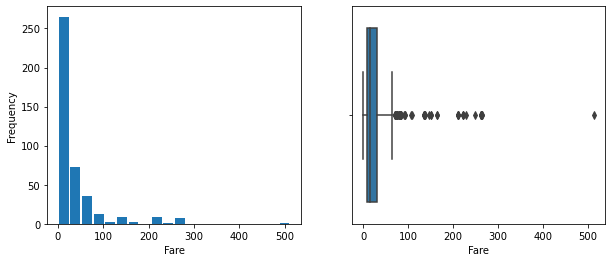

In [36]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
ax1.hist(val['Fare'], bins=20, rwidth=0.85); ax1.set_xlabel('Fare'); ax1.set_ylabel('Frequency')
sns.boxplot(val['Fare'], ax=ax2);

In [37]:
fare_fill = val.groupby(['Parch','Pclass','Embarked'])['Fare'].median().tolist()
val.groupby(['Parch','Pclass','Embarked'])['Fare'].median()

Parch  Pclass  Embarked
0      1       C            58.57500
               Q            90.00000
               S            46.30000
       2       C            15.03330
               Q            11.52915
               S            13.00000
       3       C             7.22920
               Q             7.75000
               S             7.92500
1      1       C            83.15830
               S            81.85830
       2       C            37.00420
               S            24.50000
       3       C            15.24580
               Q            29.12500
               S            14.50000
2      1       C           134.50000
               S           151.55000
       2       C            41.57920
               S            34.62500
       3       C            11.23750
               S            22.01250
3      1       C           262.37500
       2       S            39.00000
4      1       S           263.00000
       3       S            25.46670
5      3      

In [38]:
pclass = np.array(val['Pclass'])
parch = np.array(val['Parch'])
embarked = np.array(val['Embarked'])
fare = np.zeros(pclass.shape)

for i in range(fare.shape[0]):
    if np.isnan(fare[i]) == True: # NaN
        
        if parch[i] == 0:
            if pclass[i] == 1:
                if embarked[i] == 'C':
                    fare[i] = fare_fill[0]
                elif embarked[i] == 'Q':
                    fare[i] = fare_fill[1]
                elif embarked == 'S':
                    fare[i] = fare_fill[2]
            elif pclass[i] == 2:
                if embarked[i] == 'C':
                    fare[i] = fare_fill[3]
                elif embarked[i] == 'Q':
                    fare[i] = fare_fill[4]
                elif embarked == 'S':
                    fare[i] = fare_fill[5]
            elif pclass[i] == 3:
                if embarked[i] == 'C':
                    fare[i] = fare_fill[6]
                elif embarked[i] == 'Q':
                    fare[i] = fare_fill[7]
                elif embarked == 'S':
                    fare[i] = fare_fill[8]
                    
        if parch[i] == 1:
            if pclass[i] == 1:
                if embarked[i] == 'C':
                    fare[i] = fare_fill[9]
                elif embarked == 'S':
                    fare[i] = fare_fill[10]
            elif pclass[i] == 2:
                if embarked[i] == 'C':
                    fare[i] = fare_fill[11]
                elif embarked == 'S':
                    fare[i] = fare_fill[12]
            elif pclass[i] == 3:
                if embarked[i] == 'C':
                    fare[i] = fare_fill[13]
                elif embarked[i] == 'Q':
                    fare[i] = fare_fill[14]
                elif embarked == 'S':
                    fare[i] = fare_fill[15]
                    
        if parch[i] == 2:
            if pclass[i] == 1:
                if embarked[i] == 'C':
                    fare[i] = fare_fill[16]
                elif embarked == 'S':
                    fare[i] = fare_fill[17]
            elif pclass[i] == 2:
                if embarked[i] == 'C':
                    fare[i] = fare_fill[18]
                elif embarked == 'S':
                    fare[i] = fare_fill[19]
            elif pclass[i] == 3:
                if embarked[i] == 'C':
                    fare[i] = fare_fill[20]
                elif embarked == 'S':
                    fare[i] = fare_fill[21]
                    
        elif parch[i] == 3:
            if pclass[i] == 1 and embarked[i] == 'C':
                fare[i] = fare_fill[22]
            elif pclass[i] == 2 and embarked[i] == 'S':
                fare[i] = fare_fill[23]
                
        elif parch[i] == 4 and embarked[i] == 'S':
            if pclass[i] == 1:
                fare[i] = fare_fill[24]
            elif pclass[i] == 3:
                fare[i] = fare_fill[25]
                
        elif parch[i] == 5 and pclass[i] == 3 and embarked == 'S':
            fare[i] = fare_fill[26]
        
        elif parch[i] == 6 and pclass[i] == 3 and embarked == 'S':
            fare[i] = fare_fill[27]
            
        elif parch[i] == 9 and pclass[i] == 3 and embarked == 'S':
            fare[i] = fare_fill[28] 

In [39]:
val['Fare'] = fare

In [40]:
val['Fare'].isnull().sum()

0

### Feature Engineering

1. Alone

In [41]:
parch = np.array(train['Parch'])
sibsp = np.array(train['SibSp'])
alone = np.zeros(parch.shape)

for i in range(alone.shape[0]):
    if parch[i] == 0 and sibsp[i] == 0:
        alone[i] = 1

In [42]:
train['Alone'] = alone

In [43]:
train.groupby(['Alone'])['Survived'].mean()

Alone
0.0    0.505650
1.0    0.303538
Name: Survived, dtype: float64

In [44]:
parch = np.array(val['Parch'])
sibsp = np.array(val['SibSp'])
alone = np.zeros(parch.shape)

for i in range(alone.shape[0]):
    if parch[i] == 0 and sibsp[i] == 0:
        alone[i] = 1

In [45]:
val['Alone'] = alone

2. Women

In [46]:
train.groupby(['Pclass','Sex','Alone'])['Survived'].mean()

Pclass  Sex     Alone
1       female  0.0      0.966667
                1.0      0.970588
        male    0.0      0.425532
                1.0      0.333333
2       female  0.0      0.931818
                1.0      0.906250
        male    0.0      0.277778
                1.0      0.097222
3       female  0.0      0.416667
                1.0      0.616667
        male    0.0      0.180723
                1.0      0.121212
Name: Survived, dtype: float64

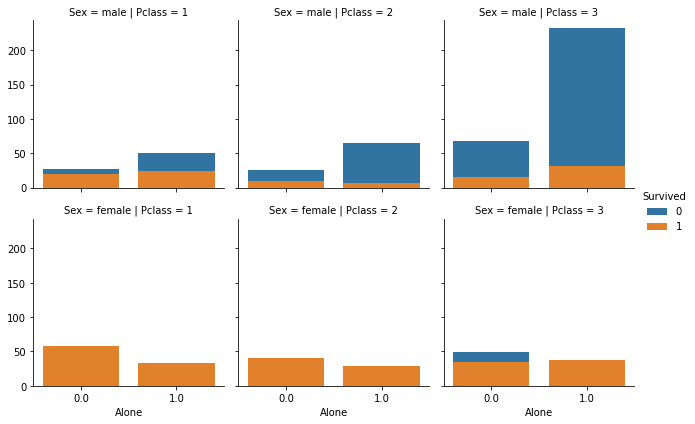

In [47]:
sns.FacetGrid(train, row='Sex', col='Pclass', 
              hue='Survived').map_dataframe(sns.countplot, 'Alone').add_legend();

In [48]:
sex = np.array(train['Sex'])
pclass = np.array(train['Pclass'])
alone = np.array(train['Alone'])
women = np.zeros(sex.shape)

for i in range(women.shape[0]):
    if sex[i]=='female' and (pclass[i]==1 or pclass[i]==2):
        women[i]=1
    elif sex[i]=='female' and pclass[i]==3:
        if alone[i]==1:
            women[i]=1

In [49]:
train['Women'] = women

In [50]:
train.groupby(['Women'])['Survived'].mean()

Women
0.0    0.217852
1.0    0.860870
Name: Survived, dtype: float64

In [51]:
sex = np.array(val['Sex'])
pclass = np.array(val['Pclass'])
alone = np.array(val['Alone'])
women = np.zeros(sex.shape)

for i in range(women.shape[0]):
    if sex[i]=='female' and (pclass[i]==1 or pclass[i]==2):
        women[i]=1
    elif sex[i]=='female' and pclass[i]==3:
        if alone[i]==1:
            women[i]=1

In [52]:
val['Women'] = women

3. Title

In [53]:
name = train['Name'].tolist()
title = np.array([w.split()[1] for w in name])

In [54]:
np.unique(title, return_counts=True)

(array(['Billiard,', 'Capt.', 'Carlo,', 'Col.', 'Cruyssen,', 'Don.', 'Dr.',
        'Gordon,', 'Impe,', 'Jonkheer.', 'Major.', 'Master.', 'Melkebeke,',
        'Messemaeker,', 'Miss.', 'Mlle.', 'Mme.', 'Mr.', 'Mrs.', 'Ms.',
        'Mulder,', 'Pelsmaeker,', 'Planke,', 'Rev.', 'Shawah,', 'Steen,',
        'Velde,', 'Walle,', 'der', 'the', 'y'], dtype='<U12'),
 array([  1,   1,   1,   2,   1,   1,   7,   2,   3,   1,   2,  40,   1,
          1, 179,   2,   1, 502, 121,   1,   1,   1,   3,   6,   1,   1,
          1,   1,   1,   1,   4]))

In [55]:
for i in range(title.shape[0]):
    if title[i] == 'Master.' or title[i] == 'Miss.' or title[i] == 'Mr.' or title[i] == 'Mrs.':
        title[i] = title[i]
    else:
        title[i] = 'Rare'

In [56]:
train['Title'] = title

In [57]:
train['Title'].value_counts()

Mr.        502
Miss.      179
Mrs.       121
Rare        49
Master.     40
Name: Title, dtype: int64

In [58]:
train.groupby(['Title'])['Survived'].mean()

Title
Master.    0.575000
Miss.      0.703911
Mr.        0.157371
Mrs.       0.801653
Rare       0.346939
Name: Survived, dtype: float64

In [59]:
train.groupby(['Pclass','Title'])['Survived'].mean()

Pclass  Title  
1       Master.    1.000000
        Miss.      0.956522
        Mr.        0.352381
        Mrs.       0.975610
        Rare       0.571429
2       Master.    1.000000
        Miss.      0.939394
        Mr.        0.078652
        Mrs.       0.902439
        Rare       0.250000
3       Master.    0.392857
        Miss.      0.510000
        Mr.        0.113636
        Mrs.       0.512821
        Rare       0.125000
Name: Survived, dtype: float64

In [60]:
title = np.array(train['Title'])
pclass = np.array(train['Pclass'])
title_pclass = np.zeros(title.shape)

for i in range(title_pclass.shape[0]):
    if title[i]=='Master.' or title[i]=='Miss.' or title[i]=='Mrs.':
        if pclass[i]==1 or pclass[i]==2:
            title_pclass[i]=1
    else:
        title_pclass[i]=title_pclass[i]

In [61]:
train['Title_Pclass'] = title_pclass

In [62]:
train.groupby(['Title_Pclass'])['Survived'].mean()

Title_Pclass
0.0    0.247911
1.0    0.947977
Name: Survived, dtype: float64

In [63]:
# val df
name = val['Name'].tolist()
title = np.array([w.split()[1] for w in name])

In [64]:
for i in range(title.shape[0]):
    if title[i] == 'Master.' or title[i] == 'Miss.' or title[i] == 'Mr.' or title[i] == 'Mrs.':
        title[i] = title[i]
    else:
        title[i] = 'Rare'

In [65]:
val['Title'] = title

In [66]:
title = np.array(val['Title'])
pclass = np.array(val['Pclass'])
title_pclass = np.zeros(title.shape)

for i in range(title_pclass.shape[0]):
    if title[i]=='Master.' or title[i]=='Miss.' or title[i]=='Mrs.':
        if pclass[i]==1 or pclass[i]==2:
            title_pclass[i]=1
    else:
        title_pclass[i]=title_pclass[i]

In [67]:
val['Title_Pclass'] = title_pclass

In [68]:
train = train[['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Alone', 'Women', 'Title',
       'Title_Pclass', 'Survived']]

### Model

In [69]:
train_df = train.copy()
val_df = val.copy()

In [70]:
train_df['Sex'] = train_df['Sex'].map({'male':0, 'female':1})
val_df['Sex'] = val_df['Sex'].map({'male':0, 'female':1})

In [71]:
cat_variables = ['Embarked','Title']

train_df = pd.get_dummies(train_df, columns=cat_variables)
val_df = pd.get_dummies(val_df, columns=cat_variables)

In [72]:
train_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Alone', 'Women', 'Title_Pclass', 'Survived', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Title_Master.', 'Title_Miss.', 'Title_Mr.',
       'Title_Mrs.', 'Title_Rare'],
      dtype='object')

In [73]:
val_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Alone', 'Women', 'Title_Pclass',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master.',
       'Title_Miss.', 'Title_Mr.', 'Title_Mrs.', 'Title_Rare'],
      dtype='object')

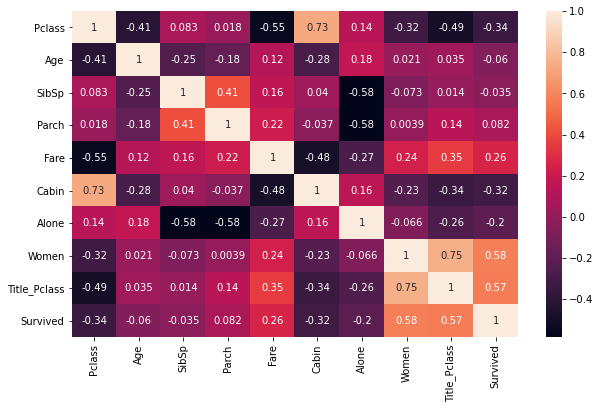

In [74]:
fig, ax=plt.subplots(figsize=(10,6))
sns.heatmap(train.corr(), annot=True, ax=ax);

In [75]:
labels = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Alone', 'Women', 'Title_Pclass', 
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Miss.', 'Title_Mr.',
       'Title_Mrs.', 'Title_Rare']

In [76]:
X = train_df[labels]
y = train_df[['Survived']]

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [78]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((712, 17), (179, 17), (712, 1), (179, 1))

In [79]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

In [80]:
max_depth = [5,10,30]
min_data_in_leaf = [100,500,1000]
learning_rate = [0.01, 0.1, 0.5]
n_estimators = [50,100,150]

param_grid = dict(num_leaves=num_leaves, max_depth=max_depth, learning_rate=learning_rate, n_estimators=n_estimators,
                 num_terations=200)

clf = LGBMClassifier(random_state=42, n_jobs=1)

gs = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3).fit(x_train, y_train)

In [81]:
gs.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50, 'num_leaves': 10}

In [82]:
mdl = LGBMClassifier(learning_rate=0.1, max_depth=5, n_estimators=50, num_leaves=10, random_state=42, n_jobs=-1)

In [83]:
mdl.fit(x_train, y_train)

LGBMClassifier(max_depth=5, n_estimators=50, num_leaves=10, random_state=42)

In [84]:
y_pred = mdl.predict(x_test)

In [85]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

In [86]:
confusion_matrix(y_test, y_pred)

array([[89, 16],
       [20, 54]])

In [87]:
precision_score(y_test, y_pred)

0.7714285714285715

In [88]:
recall_score(y_test, y_pred)

0.7297297297297297

In [89]:
accuracy_score(y_test, y_pred)

0.7988826815642458

### Submission

In [ ]:
x_submission = val[labels]

In [ ]:
x_submission.head()

In [ ]:
predictions = mdl.predict(x_submission)

In [ ]:
PassengerId = val['PassengerId']

In [ ]:
predictions.shape, PassengerId.shape

In [ ]:
submission = pd.DataFrame(predictions, index=PassengerId, columns=['Survived'])

In [ ]:
submission